In [1]:
# Import the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from pandas import DataFrame

# set this so the graphs open internally
%matplotlib inline

In [2]:
# Read all the files
# main netflix file
netflix_titles = pd.read_csv("netflix_titles.csv")
# netflix original content files
netflix_original = pd.read_csv("netflix_original_movie_data.csv")
# imdb basic name (title) file
imdb_title_basic = pd.read_csv("title.basics.tsv", sep='\t')
# imdb rating file
imdb_ratings = pd.read_csv("title.ratings.tsv", sep='\t')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Add column called original and give value 1 for original content in netflix_original dataframe
netflix_original["original"] = 1

In [4]:
# delete all columns except Title and original in netflix_original dataframe
# these columns contain lots of missing info and are duplicated in the main netflix file
netflix_original.drop(netflix_original.iloc[:, 2:48], inplace=True, axis=1)
netflix_original.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
# merge the 2 netflix files together
netflix_combined_df = pd.merge(netflix_titles, netflix_original, how="left", left_on="title", \
                               right_on="Title", sort=True, copy=True)

In [6]:
# fill the non-original content as value 0
netflix_combined_df['original'] = netflix_combined_df['original'].fillna(0)

In [7]:
# delete duplicates in netflix_combined_df
netflix_combined_df.drop_duplicates('title', inplace = True)

In [8]:
# check if there are null values in any of the columns in netflix_combined_df
netflix_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 7797
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       7787 non-null   object 
 1   type          7787 non-null   object 
 2   title         7787 non-null   object 
 3   director      5398 non-null   object 
 4   cast          7069 non-null   object 
 5   country       7280 non-null   object 
 6   date_added    7777 non-null   object 
 7   release_year  7787 non-null   int64  
 8   rating        7780 non-null   object 
 9   duration      7787 non-null   object 
 10  listed_in     7787 non-null   object 
 11  description   7787 non-null   object 
 12  Title         417 non-null    object 
 13  original      7787 non-null   float64
dtypes: float64(1), int64(1), object(12)
memory usage: 912.5+ KB


In [9]:
# fill those null values with "No info"
netflix_combined_df['director'] = netflix_combined_df['director'].fillna("No info")
netflix_combined_df['cast'] = netflix_combined_df['cast'].fillna("No info")
netflix_combined_df['country'] = netflix_combined_df['country'].fillna("No info")
netflix_combined_df['date_added'] = netflix_combined_df['date_added'].fillna("No info")
netflix_combined_df['rating'] = netflix_combined_df['rating'].fillna("No info")

In [10]:
# delete duplicated Title column
netflix_combined_df.drop(['Title'], inplace=True, axis=1)

In [11]:
# merge the imdb datasets
imdb_df = pd.merge(imdb_title_basic, imdb_ratings, how="inner", on="tconst", sort=True, copy=True)

In [12]:
# merge the imdb_df to the netflix_combined_df
netflix_df = pd.merge(netflix_combined_df, imdb_df, how="left", left_on="title", right_on="primaryTitle")

In [13]:
# delete all the duplicate rows
netflix_df.drop_duplicates('title', inplace = True)

In [14]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7787 entries, 0 to 24011
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         7787 non-null   object 
 1   type            7787 non-null   object 
 2   title           7787 non-null   object 
 3   director        7787 non-null   object 
 4   cast            7787 non-null   object 
 5   country         7787 non-null   object 
 6   date_added      7787 non-null   object 
 7   release_year    7787 non-null   int64  
 8   rating          7787 non-null   object 
 9   duration        7787 non-null   object 
 10  listed_in       7787 non-null   object 
 11  description     7787 non-null   object 
 12  original        7787 non-null   float64
 13  tconst          6197 non-null   object 
 14  titleType       6197 non-null   object 
 15  primaryTitle    6197 non-null   object 
 16  originalTitle   6197 non-null   object 
 17  isAdult         6197 non-null   

In [15]:
# delete the following columns that are duplicated or simply not needed: 
# tconst, titleType, primaryTitle, originalTitle, isAdult, startYear, endYear
netflix_df.drop(netflix_df.iloc[:, 13:20], inplace=True, axis=1)

In [16]:
# fill those null values with "No info" for string type or 0 for float type
netflix_df['runtimeMinutes'] = netflix_df['runtimeMinutes'].fillna(0)
netflix_df['genres'] = netflix_df['genres'].fillna("No info")
netflix_df['averageRating'] = netflix_df['averageRating'].fillna(0)
netflix_df['numVotes'] = netflix_df['numVotes'].fillna(0)

In [17]:
# export dataframe to file for checking
netflix_df.to_csv("netflix_df.csv")

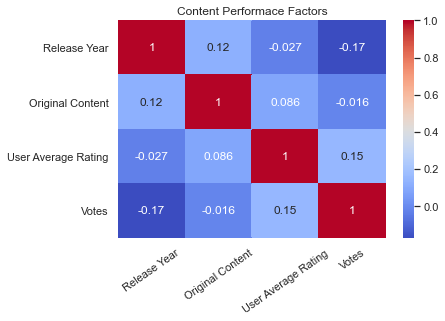

In [64]:
# First, find any correlation factors to analyse using heatmap
labels = ["Release Year", "Original Content", "User Average Rating", "Votes"]
x_axis_labels = labels
y_axis_labels = labels

ax = sns.heatmap(netflix_df.corr(),cmap='coolwarm',annot=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set(title="Content Performace Factors")
plt.xticks(rotation=35)
plt.show()

In [63]:
# Unfortunately, no correlation factors can be found between Release Year, 
# Original/Non-original Content, User Average Rating and Votes
# To continue my analysis, I would look deeper into different factors individually 
# and study those records or data that perform exceedingly well for those factors 

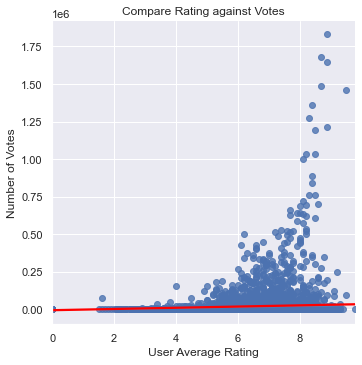

In [67]:
# Next, find what is the baseline of for votes and user rating to use before proceeding to analyse the dataset further

ax = sns.lmplot(x='averageRating',y='numVotes', data= netflix_df, height=5, palette='pastel', line_kws={'color': 'red'})
ax.set(xlabel='User Average Rating', ylabel='Number of Votes', title="Compare Rating against Votes")
plt.show()

In [ ]:
# As shown in the line plot above, both the user average rating and number of votes are widely spread apart
# Both the user average rating and number of votes are two factors needed to determine the content performance
# Since I want to find good quality content approved(enjoyed) by many people, I will filter the dataframe with 
# content that at least reach upper quartile average user rating and above.
# I choose content that has higher than median because having median user average rating imply 
# that the viewers find the content merely acceptable but not good or excellent
# There are significant programs with good user average ratings but did not receive many votes from viewers
# These could be multiple reasons for this.
# 1) Not many people watch it because they are simply unaware of the show. Show is not promoted / marketed well
# 2) Show appeal only to a small set of viewers
# 3) While it may be good, it might not create much of an impression or impact 
# on viewers for them to make an effort to cast vote 
# But how about the number of votes? Where should the baseline be?

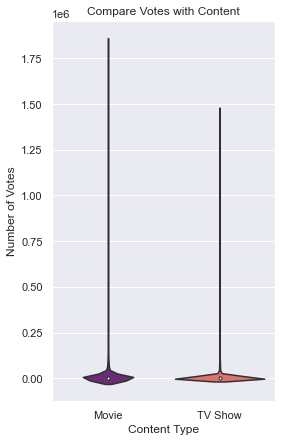

In [69]:
# View the distribution of the number of votes to decide what the baseline should be
# in the violinplot below
plt.figure(figsize=(4, 7))
ax = sns.violinplot(y="numVotes", x="type", data=netflix_df, palette='magma')
ax.set(xlabel='Content Type', ylabel='Number of Votes', title="Compare Votes with Content")
plt.show()

In [ ]:
# As shown in the violinplot above, most of the votes caster are in the outliers and upper quartile section
# Another important factor besides user average rating is votes casted for the show
# because we need to ensure that many people enjoy the show
# Considering the distribution of the number of votes casted across both movies and TV shows,
# I decide to take the median as the baseline. 
# I consider anything below median, that the show simply does not have enough viewers to 
# qualify as a content that appeal to many people or content that does not make enough impact or impression on users

In [70]:
# Find what is median of the votes and what is the upper quartile user average rating
# and filter off the rest of the dataset
netflix_df.describe()

,release_year,original,averageRating,numVotes
count,7787.000000,7787.000000,7787.000000,7.787000e+03
mean,2013.932580,0.053551,5.195531,1.487910e+04
std,8.757395,0.225144,2.849809,7.658453e+04
min,1925.000000,0.000000,0.000000,0.000000e+00
25%,2013.000000,0.000000,4.400000,1.100000e+01
50%,2017.000000,0.000000,6.300000,2.860000e+02
75%,2018.000000,0.000000,7.200000,2.528500e+03
max,2021.000000,1.000000,9.800000,1.829868e+06


In [71]:
# dataset that are filtered off to fullfill our criteria
filtered_netflix_df = netflix_df[(netflix_df['averageRating'] >= 7.2) & (netflix_df['numVotes'] >=286)]
# sort the dataset to check if the filtering is done correctly
filtered_netflix_df.sort_values(by=['numVotes', 'averageRating'], ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,original,runtimeMinutes,genres,averageRating,numVotes
13950,s5003,Movie,Pulp Fiction,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...,0.0,154,"Crime,Drama",8.9,1829868.0
20098,s6649,Movie,The Matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...,0.0,136,"Action,Sci-Fi",8.7,1679783.0
19993,s6617,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,0.0,201,"Action,Adventure,Drama",8.9,1645594.0
19996,s6618,Movie,The Lord of the Rings: The Two Towers,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2002,PG-13,179 min,"Action & Adventure, Sci-Fi & Fantasy",Frodo and Sam head to Mordor to destroy the On...,0.0,179,"Action,Adventure,Drama",8.7,1488206.0
2749,s1090,TV Show,Breaking Bad,No info,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,0.0,49,"Crime,Drama,Thriller",9.5,1463223.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9959,s3527,Movie,Lalbaug Parel: Zali Mumbai Sonyachi,Mahesh Manjrekar,"Sachin Khedekar, Seema Biswas, Ankush Chaudhar...",India,"March 15, 2018",2010,TV-MA,145 min,"Dramas, International Movies",Industrial workers struggle against the greed ...,0.0,146,Action,7.2,290.0
15516,s5495,TV Show,Sensitive Skin,No info,"Kim Cattrall, Don McKellar, Nicolas Wright, Jo...",Canada,"December 1, 2019",2016,TV-MA,1 Season,TV Comedies,Davina and Al try to revamp their lives as the...,0.0,29,"Comedy,Drama,Romance",7.9,289.0
19195,s6404,TV Show,The Good Detective,No info,"Son Hyun-joo, Jang Seung-jo, Lee Elijah, Oh Ju...",South Korea,"November 1, 2020",2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",When doubts rise about a five-year-old murder ...,0.0,60,"Action,Drama,Mystery",7.4,289.0
2089,s903,TV Show,"Big Dreams, Small Spaces",No info,Monty Don,United Kingdom,"July 26, 2019",2017,TV-G,3 Seasons,"British TV Shows, International TV Shows, Real...",Writer and presenter Monty Don helps England's...,0.0,\N,Reality-TV,8.1,287.0


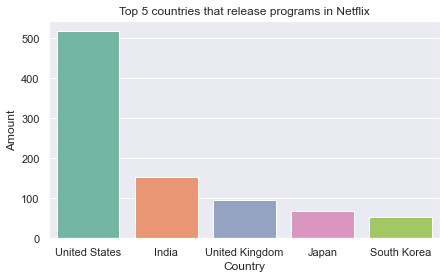

In [72]:
# Find which country released the most content in Netflix
# This reflects the demand and business model of netflix
# There are significant netflix viewers from these top 5 countries 
# and/or significant netflix viewers who love the content from these top 5 countries
plt.figure(figsize=(7,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="country", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['country'].value_counts().index[0:5])
ax.set(xlabel='Country', ylabel='Amount', title="Top 5 countries that release programs in Netflix")
plt.show()

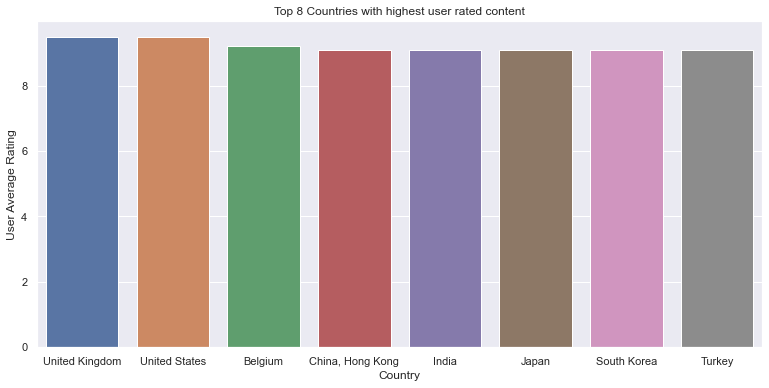

In [77]:
# Just because most content are released from those 5 countries, 
# does not mean the countries produce very good quality content
# Find out the top 8 countries that gets highest user rating for their shows

high_rated_countries = filtered_netflix_df.groupby('country')['averageRating'].agg('max').nlargest(8).reset_index()
high_rated_countries.sort_values(by='averageRating', ascending=False, inplace=True)
plt.figure(figsize=(13,6))
ax = sns.barplot(x="country", y="averageRating", data=high_rated_countries)
ax.set(xlabel='Country', ylabel='User Average Rating', title="Top 8 Countries with highest user rated content")
plt.show()

In [ ]:
# Comparing the countplot and barplot, I can see that Netflix has made a good decion to have content 
# from the top 5 countries as they are also the top 7 countries that produce the highest user rated content
# Also Netflix can look more deeper to analyse contents produced by the other countries not in the above top 5:
# Belgium, (China, Hong Kong), Turkey
# These might be potential good contents that can be placed in their catalog for their viewers to enjoy

In [79]:
# Create a new dataframe to filter off records that contains No info for directors
# otherwise countplot and barplot for Directors related analysis will contain 'No info'
directors_df = filtered_netflix_df[(filtered_netflix_df['director'] != 'No info')]
directors_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,original,runtimeMinutes,genres,averageRating,numVotes
23,s55,Movie,100 Meters,Marcel Barrena,"Dani Rovira, Karra Elejalde, Alexandra Jiménez...","Portugal, Spain","March 10, 2017",2016,TV-MA,109 min,"Dramas, International Movies, Sports Movies",A man who is diagnosed with multiple sclerosis...,0.0,108,"Biography,Comedy,Drama",7.6,5289.0
85,s84,Movie,20th Century Women,Mike Mills,"Annette Bening, Elle Fanning, Greta Gerwig, Lu...",United States,"June 28, 2019",2016,R,119 min,"Dramas, Independent Movies","In 1979, single bohemian mom Dorothea, hoping ...",0.0,119,"Comedy,Drama",7.3,40257.0
111,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",No info,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,0.0,115,"Crime,Drama",7.8,2286.0
114,s101,Movie,3 Idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,"August 1, 2019",2009,PG-13,164 min,"Comedies, Dramas, International Movies",While attending one of India's premier college...,0.0,170,"Comedy,Drama",8.4,345258.0
122,s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...","Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br...",0.0,105,"Biography,Drama",7.2,903.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23858,s7758,Movie,Zach Galifianakis: Live at the Purple Onion,Michael Blieden,"Zach Galifianakis, Brian Unger",United States,"February 26, 2019",2006,TV-MA,61 min,Stand-Up Comedy,"The unorthodox, piano-playing stand-up star Za...",0.0,72,"Comedy,Documentary",7.3,3608.0
23921,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...,0.0,155,"Comedy,Drama",8.1,68035.0
23944,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...,0.0,10,"Documentary,Short",7.4,474.0
23967,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",0.0,\N,"Comedy,Drama,Family",7.6,304.0


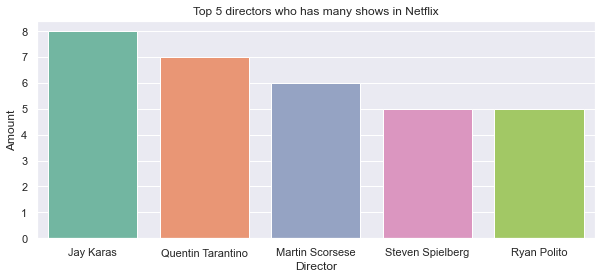

In [85]:
# Countplot for the top 5 directors that has many shows available in Netflix
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="director", data=directors_df, palette="Set2", \
                   order=directors_df['director'].value_counts().index[0:5])
ax.set(xlabel='Director', ylabel='Amount', title="Top 5 directors who \
has many shows in Netflix")
plt.show()

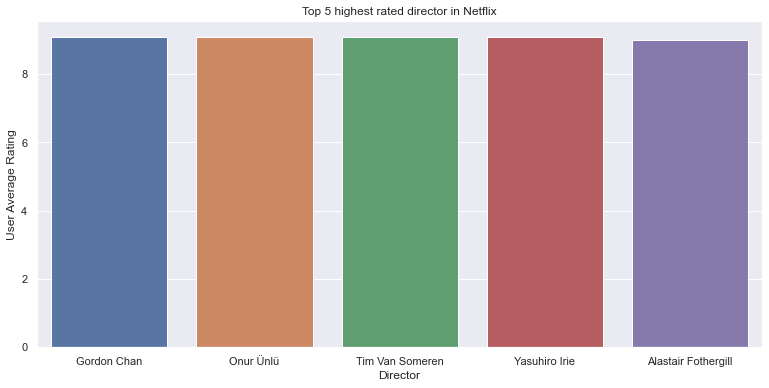

In [94]:
# Barplot for the top 5 directors that has highest rated shows in Netflix
high_rated_directors = directors_df.groupby('director')['averageRating'].agg('max').nlargest(5).reset_index()
high_rated_directors.sort_values(by='averageRating', ascending=False, inplace=True)
plt.figure(figsize=(13,6))
ax = sns.barplot(x="director", y="averageRating", data=high_rated_directors)
ax.set(xlabel='Director', ylabel='User Average Rating', title="Top 5 highest rated director in Netflix")
plt.show()

In [ ]:
# The highest rated and the most available directors bring totally different results
# The highest rated directors are Non-Americans
# As evidenced from the country analysis, that many highest rated content comes from other countries 
# than US. As many US companies has start to branch out to create their own respective streaming platform,
# and therefore it will be harder for Netflix to get license for those content, acquiring US content
# is going to get more challenging. Therefore, it is imperative that they get content from outside the US or 
# produce more of their own content.
# So, one of the method is to provide more shows from these highest rated directors who already has 
# proven track record
# and promote them well in their platform so that more viewers are aware of their content and can enjoy them

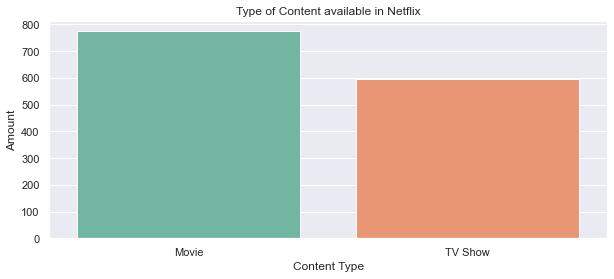

In [91]:
# Countplot for Movies and TV shows in Netflix
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['type'].value_counts().index[0:2])
ax.set(xlabel='Content Type', ylabel='Amount', title="Type of Content available in Netflix")
plt.show()

In [ ]:
# More movies compared to TV shows are available in Netflix

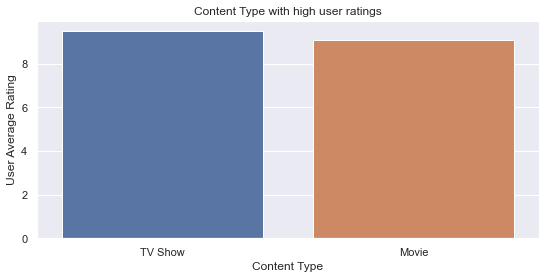

In [90]:
# Barplot to compare TV shows and movies with the highest average rating they have
high_rated_content = filtered_netflix_df.groupby('type')['averageRating'].agg('max').reset_index()
high_rated_content.sort_values(by='averageRating', ascending=False, inplace=True)
plt.figure(figsize=(9,4))
ax = sns.barplot(x="type", y="averageRating", data=high_rated_content)
ax.set(xlabel='Content Type', ylabel='User Average Rating', title="Content Type with high user ratings")
plt.show()

In [ ]:
# Netflix users seems to slightly enjoy TV shows more than movies
# I think one of the main reasons that makes Netflix upload more movies compared to TV shows 
# is because movies are easier to obtain license for broadcasting compared to TV shows
# To provide more quality content, Netflix can consider to add more TV shows to their catalog
# especially by producing their own TV content as getting license from other providers
# will require a huge effort in terms of obtaining license and competition from other streaming platforms

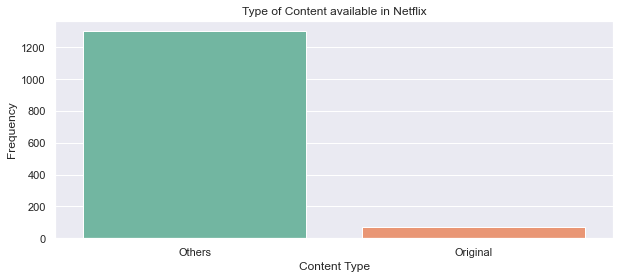

In [93]:
# As evidenced in the graph below, there are more non-original Netflix content available 
# as Netflix only start producing their own content from 2012 onwards

plt.figure(figsize=(10,4))
sns.set(style="darkgrid")

ax = sns.countplot(x="original", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['original'].value_counts().index[0:2])
ax.set(xlabel='Content Type', ylabel='Frequency', title="Type of Content available in Netflix")
ax.set_xticklabels(["Others", "Original"])
plt.show()

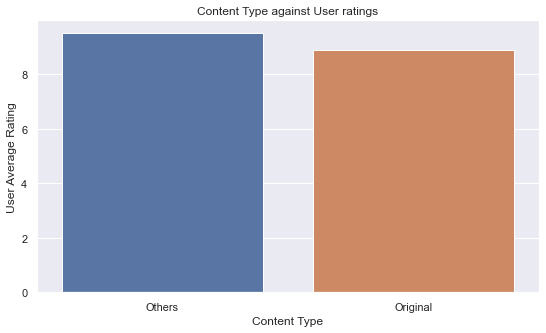

In [95]:
# User ratings for original and non-original content
high_rated_original = filtered_netflix_df.groupby('original')['averageRating'].agg('max').reset_index()
high_rated_original.sort_values(by='averageRating', ascending=False, inplace=True)
plt.figure(figsize=(9,5))
ax = sns.barplot(x="original", y="averageRating", data=high_rated_original)
ax.set(xlabel='Content Type', ylabel='User Average Rating', title="Content Type against User ratings")
ax.set_xticklabels(["Others", "Original"])
plt.show()

In [ ]:
# Comparing original and non-original content, the rating for the best user rating has not much difference
# Therefore, Nteflix can be assured that they can still use both strategies concurrently: 
# getting contents from other parties and producing their own at the same time
# Since it is harder for Netflix to obtain TV license, it makes more sense 
# for Netflix to produce more of their own original TV content
# As for getting contents from other providers, I believe it would be good if Netflix obtain more contents 
# that are Non-US to differentiate itself from its competitors and at the same time
# reduce the fighting of rights to obtain license to broadcast

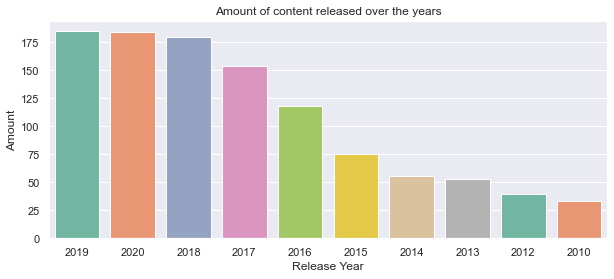

In [96]:
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="release_year", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['release_year'].value_counts().index[0:10])
ax.set(xlabel='Release Year', ylabel='Amount', title="Amount of content released over the years")
plt.show()

In [ ]:
# Most content available on Netflix are contents that are recently released from 2016 onwards

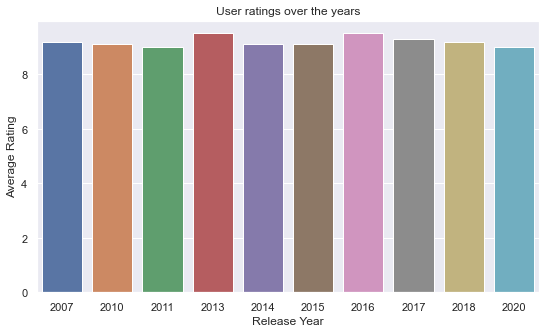

In [97]:
high_rated_years = filtered_netflix_df.groupby('release_year')['averageRating'].agg('max').nlargest(10).reset_index()
high_rated_years.sort_values(by='averageRating', ascending=False, inplace=True)
plt.figure(figsize=(9,5))
ax = sns.barplot(x="release_year", y="averageRating", data=high_rated_years)
ax.set(xlabel='Release Year', ylabel='Average Rating', title="User ratings over the years")
plt.show()

In [ ]:
# From the barplot above, the highest rated content also comes from more recent years. 
# The earliest highest rated content is from 2007
# Netflix can look into 2007, 2010 and 2011 content to see if there are other highly rated content from these years
# Overall, Netflix is on the right path to add more recent released contents to their catalog

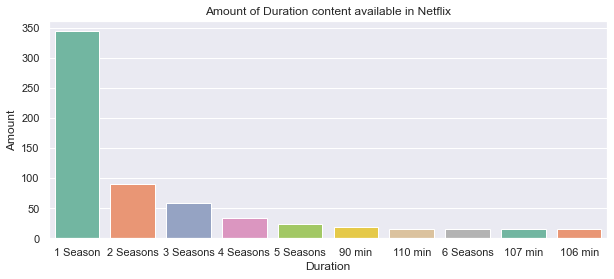

In [99]:
# Countplot of the frequent content duration available in Netflix
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="duration", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['duration'].value_counts().index[0:10])
ax.set(xlabel='Duration', ylabel='Amount', title="Amount of Duration content available in Netflix")
plt.show()

In [98]:
# Most netflix content has duration of 1 season and 90 mins, 107 mins, 110 mins
# This is really surprising 
# None of this one season TV shows are Netflix original
# There could be many possibilities: 
# 1) These TV shows are new and they just started airing
# 2) Slight title changes when it goes to another season
# 3) Only get license from the license owner to broadcast for one season. 
# I encountered this personally when some seasons of the same TV program are not available on Netflix
# Example: Season 1 and 2 is unavailable. Only season 3
# 4) If it is point 3, then it re-emphasize that Netflix is better off to produce own TV shows 
# as it ensures it has control to broadcast all seasons 
# Also it is fustrating for viewers to find that he or she can only view certain seasons on Netflix. 
# This will not be a good viewing experience for Netflix users at all

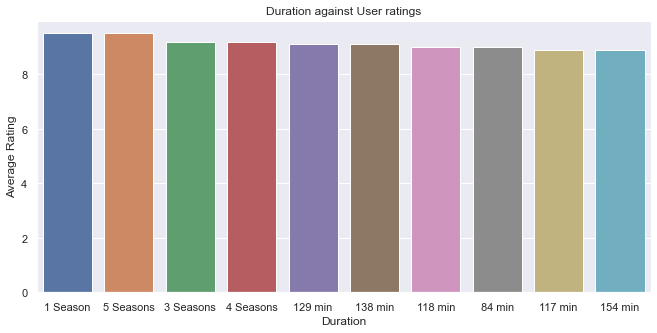

In [50]:

high_rated_duration = filtered_netflix_df.groupby('duration')['averageRating'].agg('max').nlargest(10).reset_index()
high_rated_duration.sort_values(by='averageRating', ascending=False, inplace=True)
plt.figure(figsize=(11,5))
ax = sns.barplot(x="duration", y="averageRating", data=high_rated_duration)
ax.set(xlabel='Duration', ylabel='Average Rating', title="Duration against User ratings")
plt.show()

In [ ]:
# Check again with graph to pick those shows with high averageRating
# They are generally also in the top 10 results as well
# But there are others like 3 seasons and 5 seasons and slightly more than 107 minutes
# So for TV shows, those performing well are between 1 season to 5 seasons
# And for movies, generally below 195 mins or about 3 hours or lesser
# It could be that shorter duration movies and TV shows are easier to produce compared to longer durations 
# TV shows and movies
# And obviously the longer the content is, it would cost more to produce 

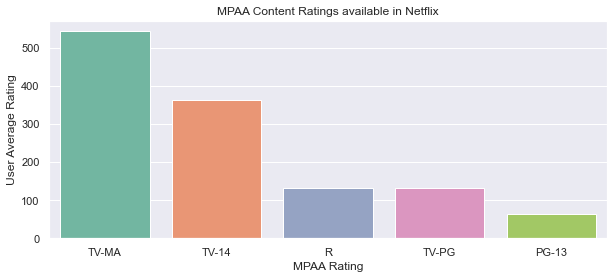

In [61]:
# mpaa_rating
# Compared to family friendly shows, it seems Netflix content shows are geared mainly towards adults
# TV-MA: program for mature audience only
# TV-14 : program contains some material that many parents would find unsuitable for children under 14 years of age
# TV-PG : Parental guidance suggested. This program contains material that parents may find unsuitable for younger 
# children.
# R : Restricted, Children Under 17 Require Accompanying Parent or Adult Guardian. This rating means the film 
# contains adult material such as adult activity, harsh language, intense graphic violence, drug abuse and nudity.
# PG-13: Parents Strongly Cautioned. Some Material May Be Inappropriate For Children Under 13.
plt.figure(figsize=(10,4))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=filtered_netflix_df, palette="Set2", \
                   order=filtered_netflix_df['rating'].value_counts().index[0:5])
ax.set(xlabel='MPAA Rating', ylabel='User Average Rating', title="MPAA Content Ratings available in Netflix")
plt.show()

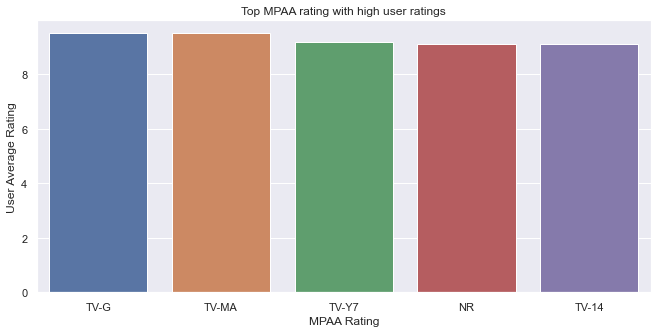

In [62]:
# However shows that perform well are a mixture of both mature programs and child friendly programs
# Therefore Netflix can consider to add more catalogue of child friendly programs in the future
# It would be also be good if Netflix platform implement good features to prevent children from accessing
# inappropriate content before adding more child friendly programs
# This is to increase more viewership so that parents can be assured 
# to let their child watch those programs on their own
high_rated_rating = filtered_netflix_df.groupby('rating')['averageRating'].agg('max').nlargest(5).reset_index()
high_rated_rating.sort_values(by='averageRating', ascending=False, inplace=True)
plt.figure(figsize=(11,5))
ax = sns.barplot(x="rating", y="averageRating", data=high_rated_rating)
ax.set(xlabel='MPAA Rating', ylabel='User Average Rating', title="Top MPAA rating with high user ratings")
plt.show()

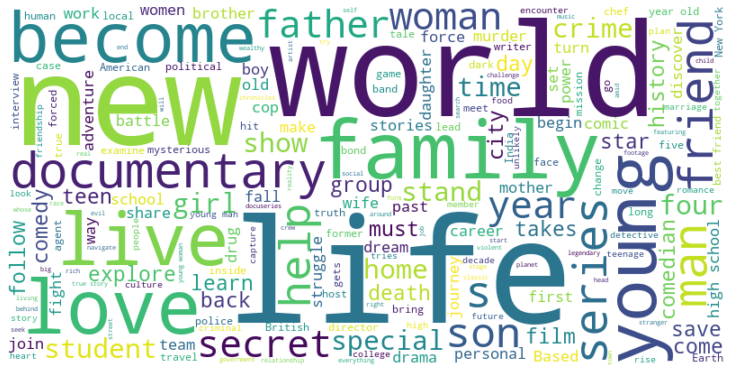

In [36]:
# Find out the words that mostly appear in Netflix description
text = " ".join(word for word in filtered_netflix_df['description'].astype(str))

stop_words = ["one", "two", "three", "find", "finds", "take"] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

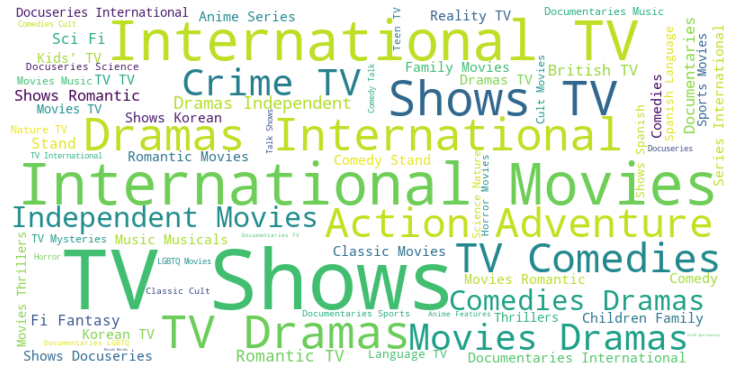

In [37]:
# Find out the words that mostly appear in Netflix categories
text = " ".join(word for word in filtered_netflix_df['listed_in'].astype(str))

stop_words = [""] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

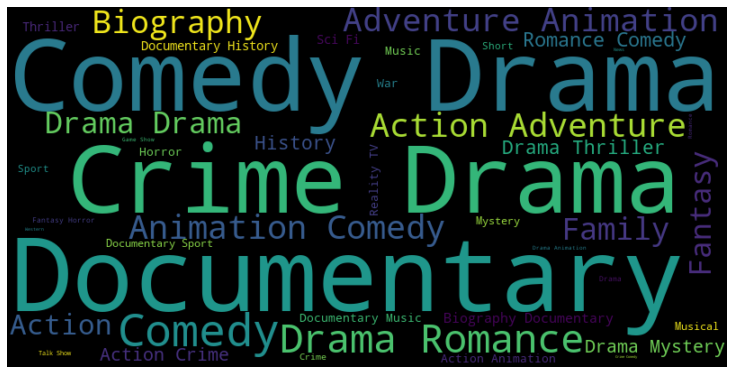

In [38]:
# Find out the words that mostly appear in IMDB genres
text = " ".join(word for word in filtered_netflix_df['genres'].astype(str))

stop_words = [""] + list(STOPWORDS)

wordcloud = WordCloud(stopwords=stop_words, background_color="black", width=800, height=400).generate(text)
plt.figure(figsize=(10,6))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [39]:
# Look at the overlap of between the 3 different wordclouds especially between Netflix categories and IMDB genres
# Comedy, Crime, Drama, Documentary, Romance, Biography, Family, Animation are genres and categories that perform well on both Netflix and IMDB
# So, Netflix should continue to expand on these categories for their catalog as they generally are enjoyed by many.


In [42]:
# In summary, there are usually a combination of factors 
# that affect viwership and likability of the shows and programs
# as there is no one factor that has clear direct relationship with each other
# So we study the records base on each factor individually that generally are on the outliers and try to combine them 
# to replicate a new program that has likelihood to be successfully enjoyed by many

# From all the above insights, it seems Netflix is on a good track that broadcast many enjoyable contents for its viewers
# To remain competitive, Netflix should continue to produce its own original TV shows content
# Netflix can also think about partnering with international directors with proven good rating contents
# and broadcast more contents from other countries such as India, UK, Japan, South Korea as it seems its viewers are 
# acceptable to watch these countries

# If they apply the above suggestions, I believe Netflix will remain ahead of their competitors 
# as other streaming platforms only just started producing their own content and they are mostly US based

# Even though, I have filtered off the high ratings shows with few votes, I can go again and study that dataset
# If I can have more data and determine that those shows are not given many votes 
# because not many audience are aware of those shows,
# Netflix can choose to obtain license from those shows and promote them well in their platform
# as Netflix has a good recommendation engine built that can market these shows towards the right audience type